# 데이터사이언스융합학과 2024710658 박창준

# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# tf 불러오기
import tensorflow as tf

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [ ]:
# keras 불러오기
from tensorflow import keras
# train_test_split
from sklearn.model_selection import train_test_split

# 패션 MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 255로 나눠서 정규화 수행
train_scaled = train_input / 255.0

# train_test_split 활용해서 검증 세트 만들기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# DL 신경망을 생성하는 함수를 정의
def model_fn(a_layer=None):
    # 신경망 생성
    model = keras.Sequential()
    # input layer 생성
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    # hidden layer 생성
    model.add(keras.layers.Dense(100, activation='relu'))

    # a_layer를 변수로 받아와 layer 추가하도록 설정
    if a_layer:
        model.add(a_layer)

    # output layer 생성
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
# 정의한 model_fn 함수를 사용해 DL 신경상 맹성
model = model_fn()

# summary() : 딥러닝 모델의 요약정보 확인 (shape, 파라미터 수 등)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model.compile() : 학습 전 손실함수, 평가지표 세팅
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# model.fit 객체를 저장
# verbose = 0 : 훈련과정 출력 조절
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
# model.fit 객체에 저장된 값 확인
print(history.history.keys())
# 해당 결과를 이용해 loss와 accuracy에 대해 편리하게 시각화 가능

dict_keys(['loss', 'accuracy'])


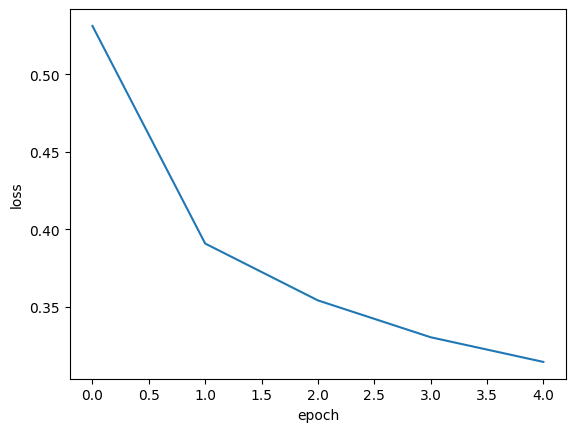

In [ ]:
# plt 불러오기
import matplotlib.pyplot as plt

# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 그래프 출력
plt.show()

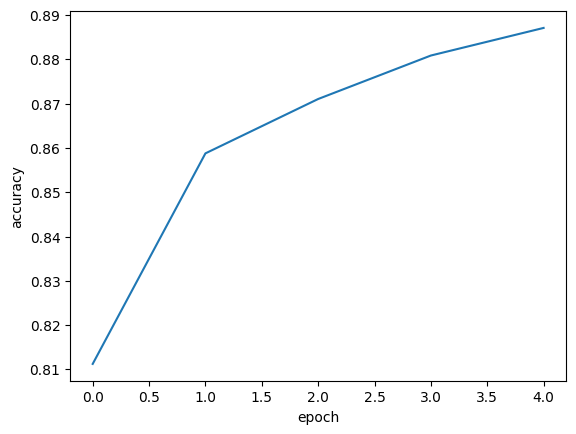

In [ ]:
# accuracy에 대한 그래프 생성
plt.plot(history.history['accuracy'])
# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('accuracy')
# 그래프 출력
plt.show()

In [ ]:
# 정의한 model_fn 함수를 사용해 DL 신경상 맹성
model = model_fn()
# model.compile() : 학습 전 손실함수, 평가지표 세팅
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# model.fit 객체 생성
# epoch(전체반복) 20으로 설정
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

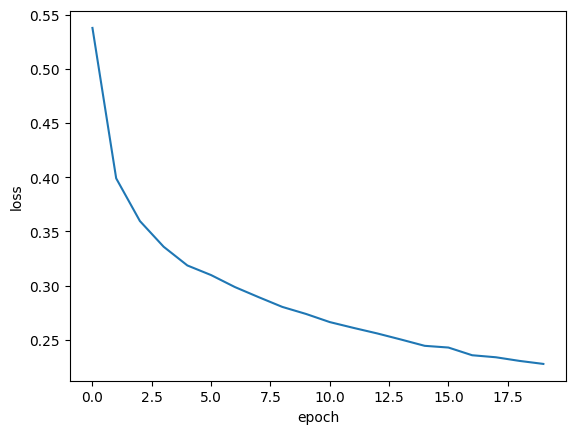

In [ ]:
# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 그래프 출력
plt.show()

## 검증 손실

In [ ]:
# 정의한 model_fn 함수를 사용해 DL 신경상 맹성
model = model_fn()
# compile로 손실함수와 평가지표 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# history에 생성된 key 확인
print(history.history.keys())
# 검증 데이터도 들어갔음

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


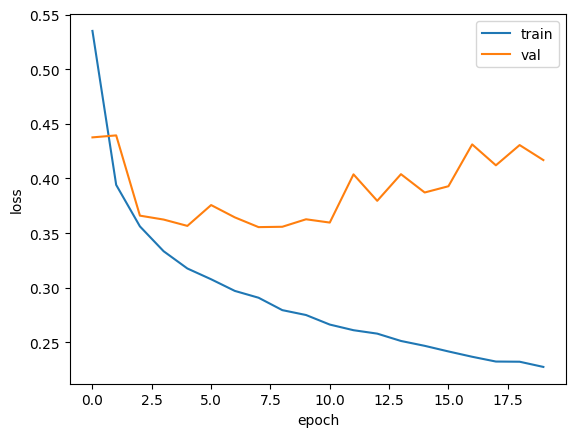

In [ ]:
# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# val_loss에 대한 그래프 생성
plt.plot(history.history['val_loss'])

# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 범례 생성
plt.legend(['train', 'val'])
# 그래프 출력
plt.show()

In [ ]:
# 정의한 model_fn 함수를 사용해 DL 신경상 맹성
model = model_fn()
# compile로 옵티마이저와 손실함수, 평가지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

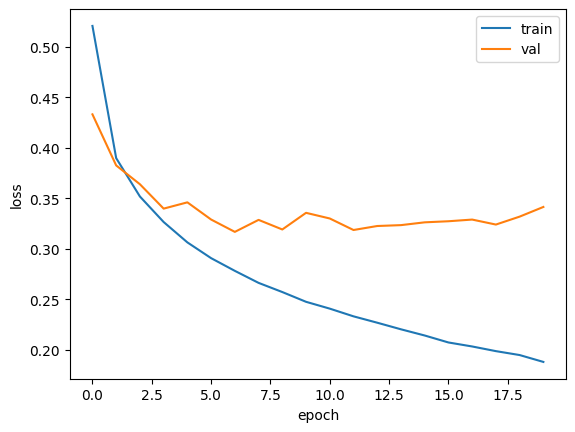

In [ ]:
# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# val_loss에 대한 그래프 생성
plt.plot(history.history['val_loss'])

# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 범례 생성
plt.legend(['train', 'val'])
# 그래프 출력
plt.show()

## 드롭아웃

In [ ]:
# dropout rate = 0.3을 설정하여 hidden layer 추가
model = model_fn(keras.layers.Dropout(0.3))

# 심층신경망 요약 출력
model.summary()
# dropout 생성 확인
# 학습에 관여하는 layer가 아니기 때문에 파라미터 수는 0임
# 일부 노드의 출력을 0으로 만들어 주는 기능을 하지만, 아예 없애는 것이 아니기 때문에 shape는 유지됨

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile로 옵티마이저와 손실함수, 평가지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

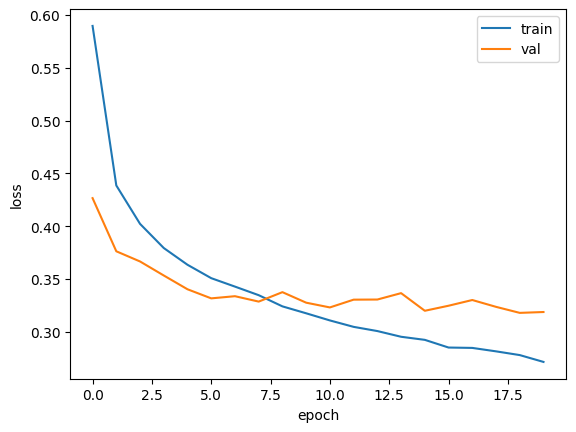

In [ ]:
# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# val_loss에 대한 그래프 생성
plt.plot(history.history['val_loss'])

# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 범례 생성
plt.legend(['train', 'val'])
# 그래프 출력
plt.show()

## 모델 저장과 복원

In [ ]:
# dropout rate = 0.3을 설정하여 hidden layer 추가
model = model_fn(keras.layers.Dropout(0.3))

# compile로 옵티마이저와 손실함수, 평가지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# 가중치만 저장하는 방법
# 차후 사용시 딥러닝 구조 재생성 필요
model.save_weights('model-weights.h5')

In [ ]:
# 딥러닝 구조와 가중치를 모두 저장하는 방법
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# !ls : list로 출력
# -al : 모델에 대한 출력
# *.h5 : h.5 확장자 모든 파일
# h.5 확장자로 된 모든 모델에 대해 list로 출력!
!ls -al *.h5

-rw-r--r-- 1 root root 333320 May 28 13:20 model-weights.h5
-rw-r--r-- 1 root root 981176 May 28 13:20 model-whole.h5


In [ ]:
# dropout rate = 0.3을 설정하여 hidden layer 추가
model = model_fn(keras.layers.Dropout(0.3))

# 모델의 가중치를 저장
model.load_weights('model-weights.h5')

In [ ]:
# numpy 불러오기
import numpy as np

# argmax : 가장 큰 값의 index를 반환
# 모델에 검증 데이터를 넣어 예측한 결과를 np로 저장
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# 접답 데이터와 예측 데이터의 일치하는 횟수를 평균으로 계산하여 정확도 출력
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8783333333333333


In [ ]:
# 사전에 저장한 딥러닝 구조와 가중치를 가져옴
model = keras.models.load_model('model-whole.h5')
# 검증 데이터로 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8783


[0.3376348912715912, 0.878333330154419]

## 콜백

In [ ]:
# dropout rate = 0.3을 설정하여 hidden layer 추가
model = model_fn(keras.layers.Dropout(0.3))

# compile로 옵티마이저와 손실함수, 평가지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# best model을 자동저장해주는 옵션
# ModelCheckpoint 객체 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
# ModelCheckpoint객체를 콜백의 파라미터로 전달
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
# 콜백을 통해 생성한 best model 결과를 로드
model = keras.models.load_model('best-model.h5')
# 검증 데이터로 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8875


[0.31828683614730835, 0.887499988079071]

In [ ]:
# dropout rate = 0.3을 설정하여 hidden layer 추가
model = model_fn(keras.layers.Dropout(0.3))

# compile로 옵티마이저와 손실함수, 평가지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# best model을 자동저장해주는 옵션
# ModelCheckpoint 객체 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

# 조기종료 옵션 설정
# patience=2 : 2번 연속으로 점수가 향상되지 않으면 조기종료
# restore_best_weights=True : 훈련 중지 후 최상의 파라미터로 돌아가 값을 저장함
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)


# model.fit에 대한 객체 생성
# 검증에 사용할 데이터를 튜플로 전달
# ModelCheckpoint객체, early_stopping_cb 객체를 콜백의 파라미터로 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
# 몇번째 epoch에서 중지되었는지 확인 가능
# epoch = 0부터 시작하므로, 실제 중지된 epoch = 출력 + 1
# 실행시마다 값 달라질 수 있음
print(early_stopping_cb.stopped_epoch)

10


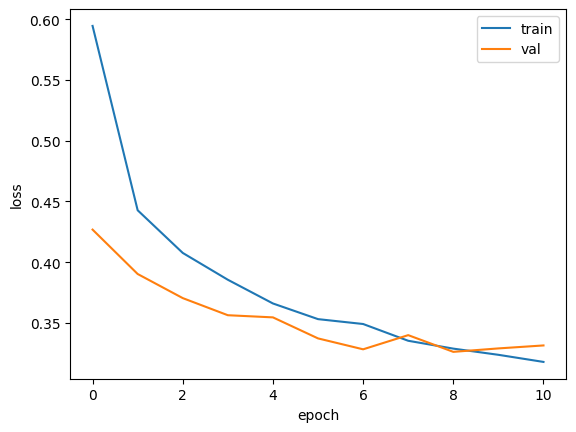

In [ ]:
# loss에 대한 그래프 생성
plt.plot(history.history['loss'])
# val_loss에 대한 그래프 생성
plt.plot(history.history['val_loss'])

# x축 제목 생성
plt.xlabel('epoch')
# y축 제목 생성
plt.ylabel('loss')
# 범례 생성
plt.legend(['train', 'val'])
# 그래프 출력
plt.show()

In [ ]:
# 평가 스코어 출력
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8792


[0.3262557089328766, 0.8792499899864197]